In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('../data/fullParamLTO.xlsx')

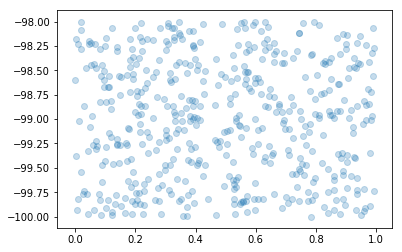

In [27]:
plt.scatter(x1, x4, alpha=0.25)

In [28]:
data = pd.DataFrame(data={0:x1, 1:x2, 2:x3, 3:x4})

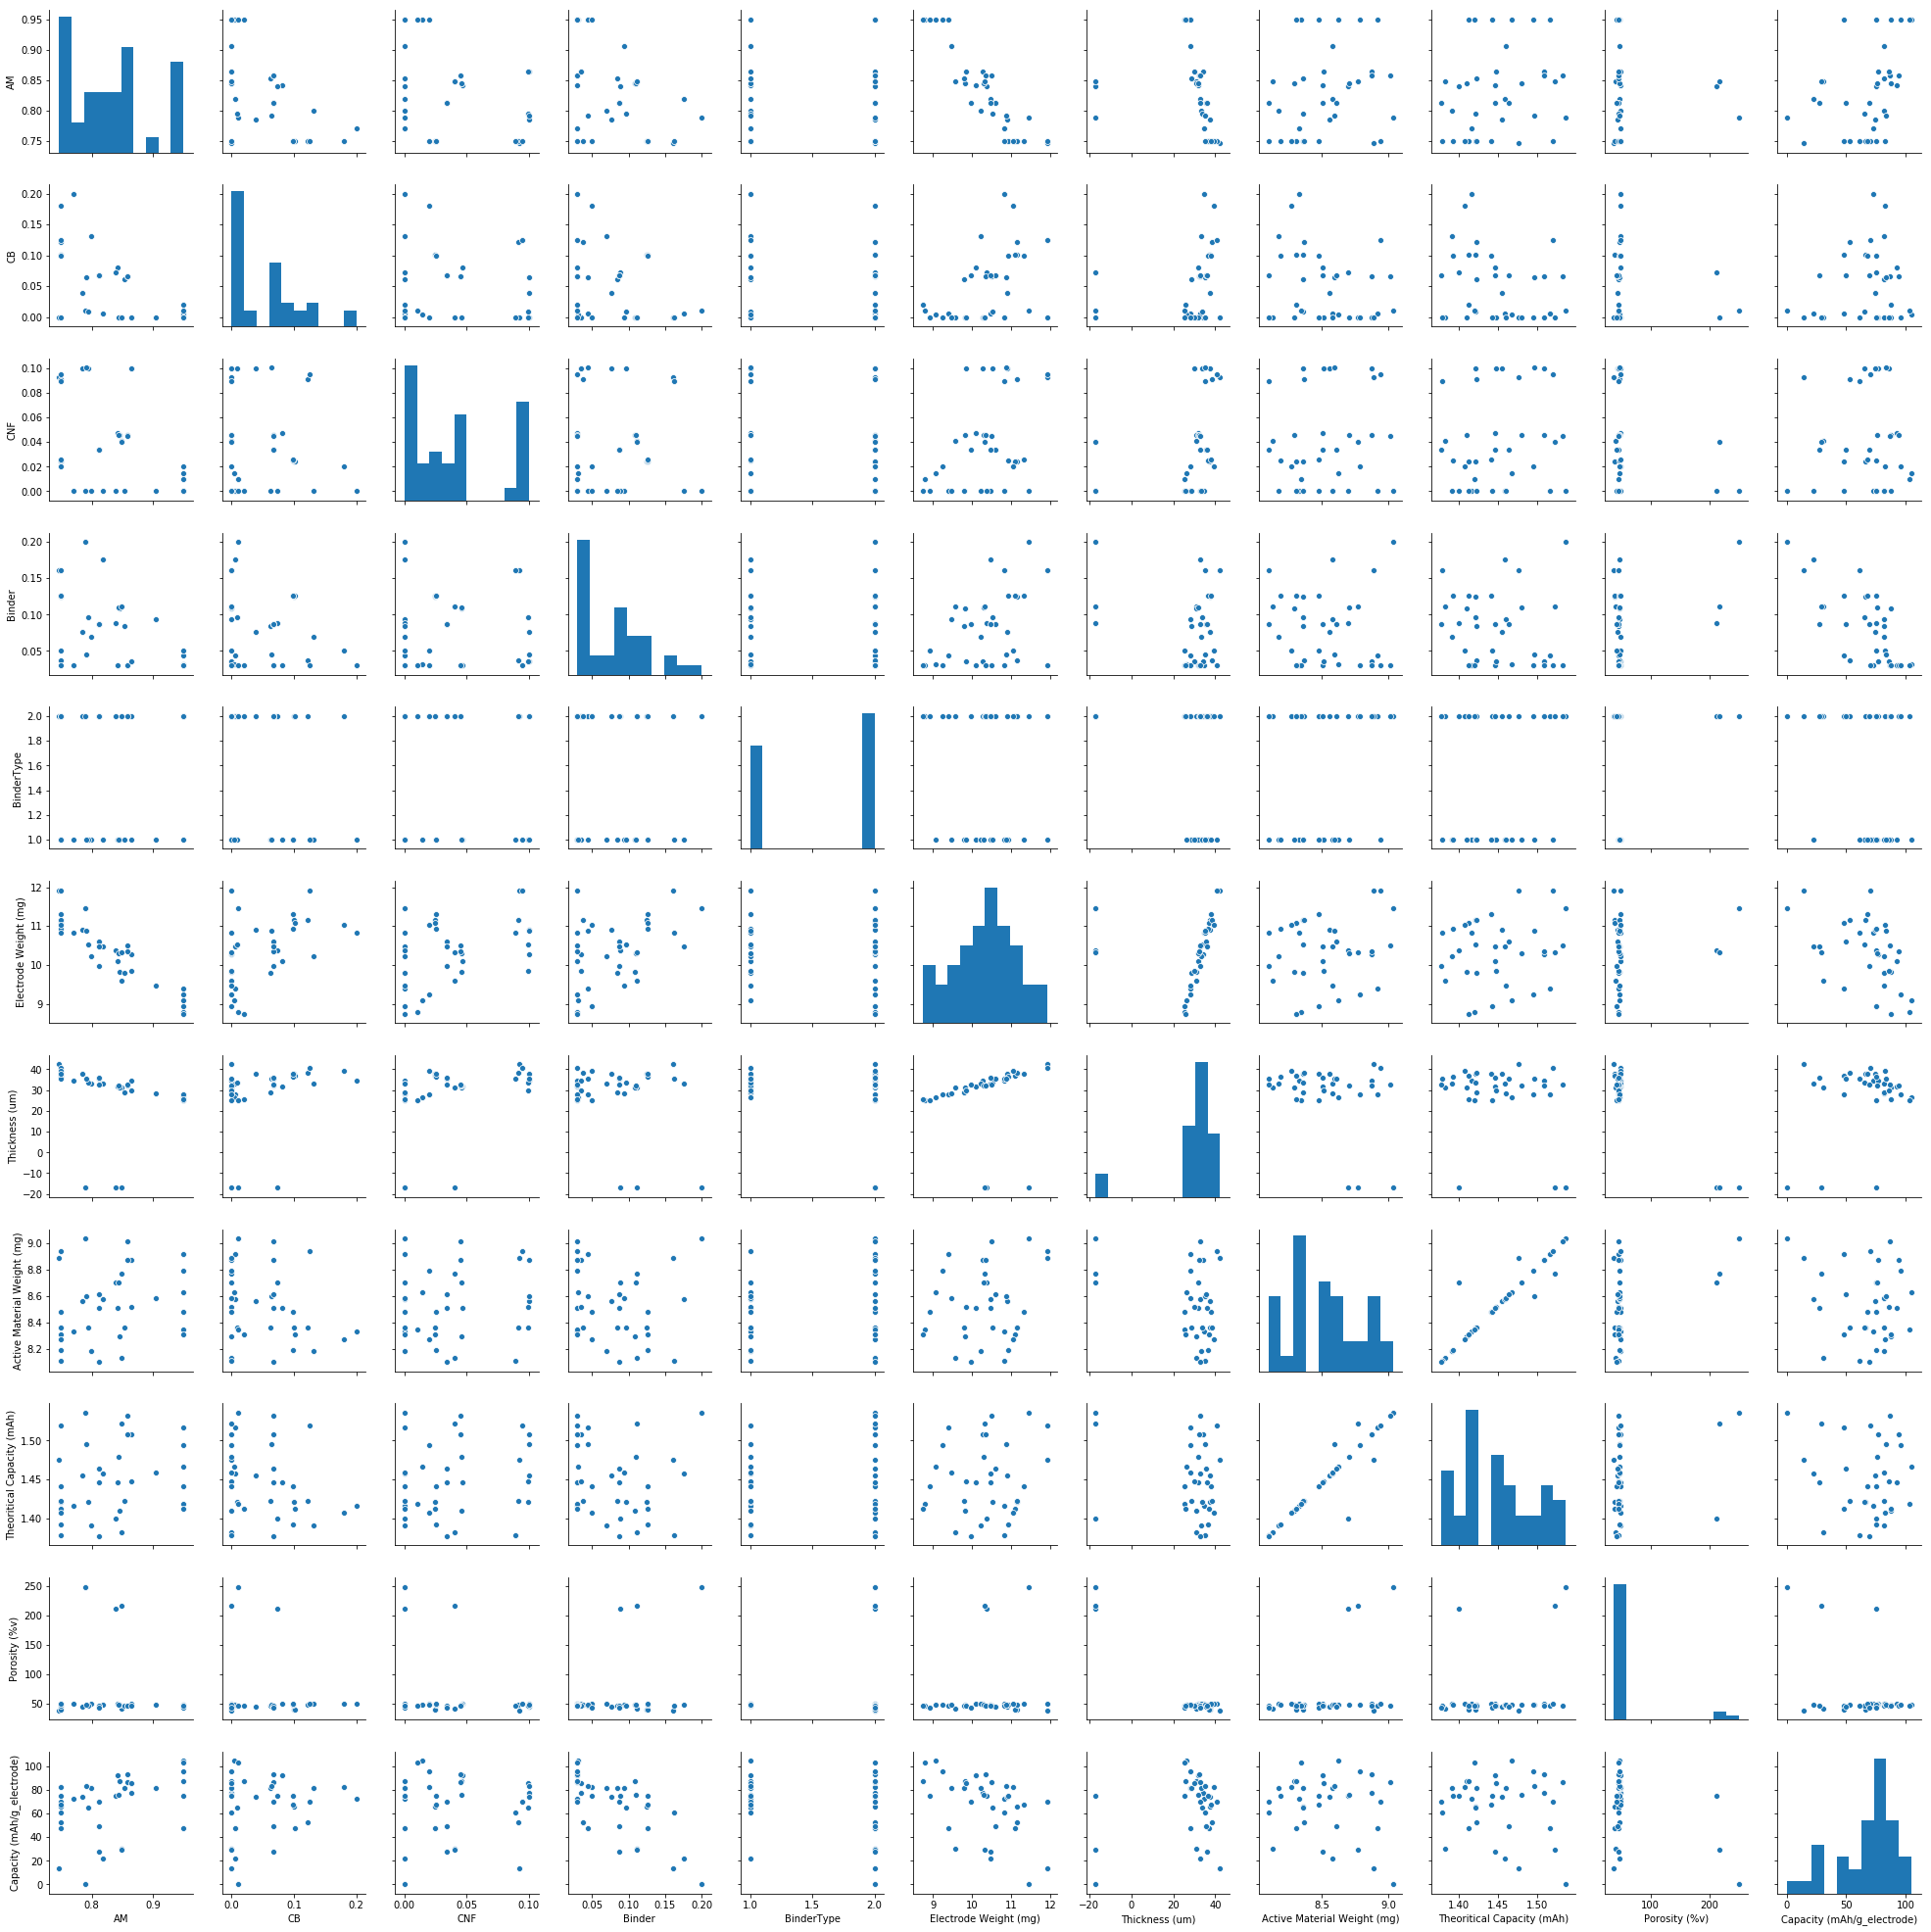

In [4]:
sns.pairplot(data)

In [10]:
scaler = preprocessing.StandardScaler().fit(data)

In [40]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
data_s = scaler.transform(data)
data_s = pd.DataFrame(data=data_s)

In [12]:
data_s.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.882433,2.747175,-1.079856,-1.073369,-1.145644,0.593359,0.388319,-0.752339,-0.703498,-0.238389,0.197119
1,0.511685,-0.932787,1.690851,-0.955746,0.872872,-0.089350,0.365070,1.314696,1.310383,-0.242613,0.390830
2,1.784181,-0.830698,-1.079856,-0.773526,0.872872,-1.181685,-0.076659,1.488281,1.479503,-0.293133,-0.795927
3,-0.660831,-0.224432,1.689790,-0.089459,0.872872,0.696800,0.597559,0.113569,0.140142,-0.320416,0.282766
4,0.183266,0.551340,0.219396,-1.067064,-1.145644,-0.296232,0.179079,-0.085943,-0.054239,-0.241506,1.006030


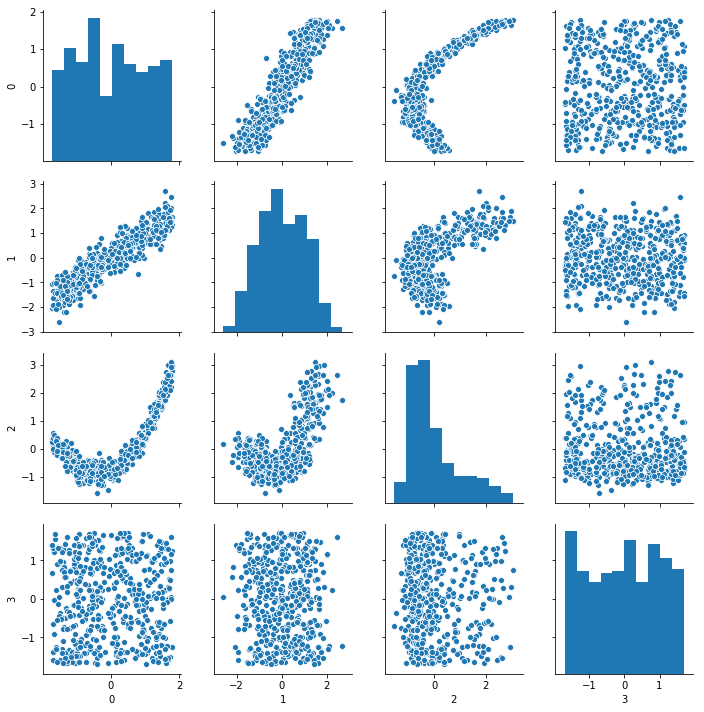

In [39]:
sns.pairplot(data_s)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=11)
data_pca= pca.fit(data_s).transform(data_s)
data_pca = pd.DataFrame(data=data_pca)

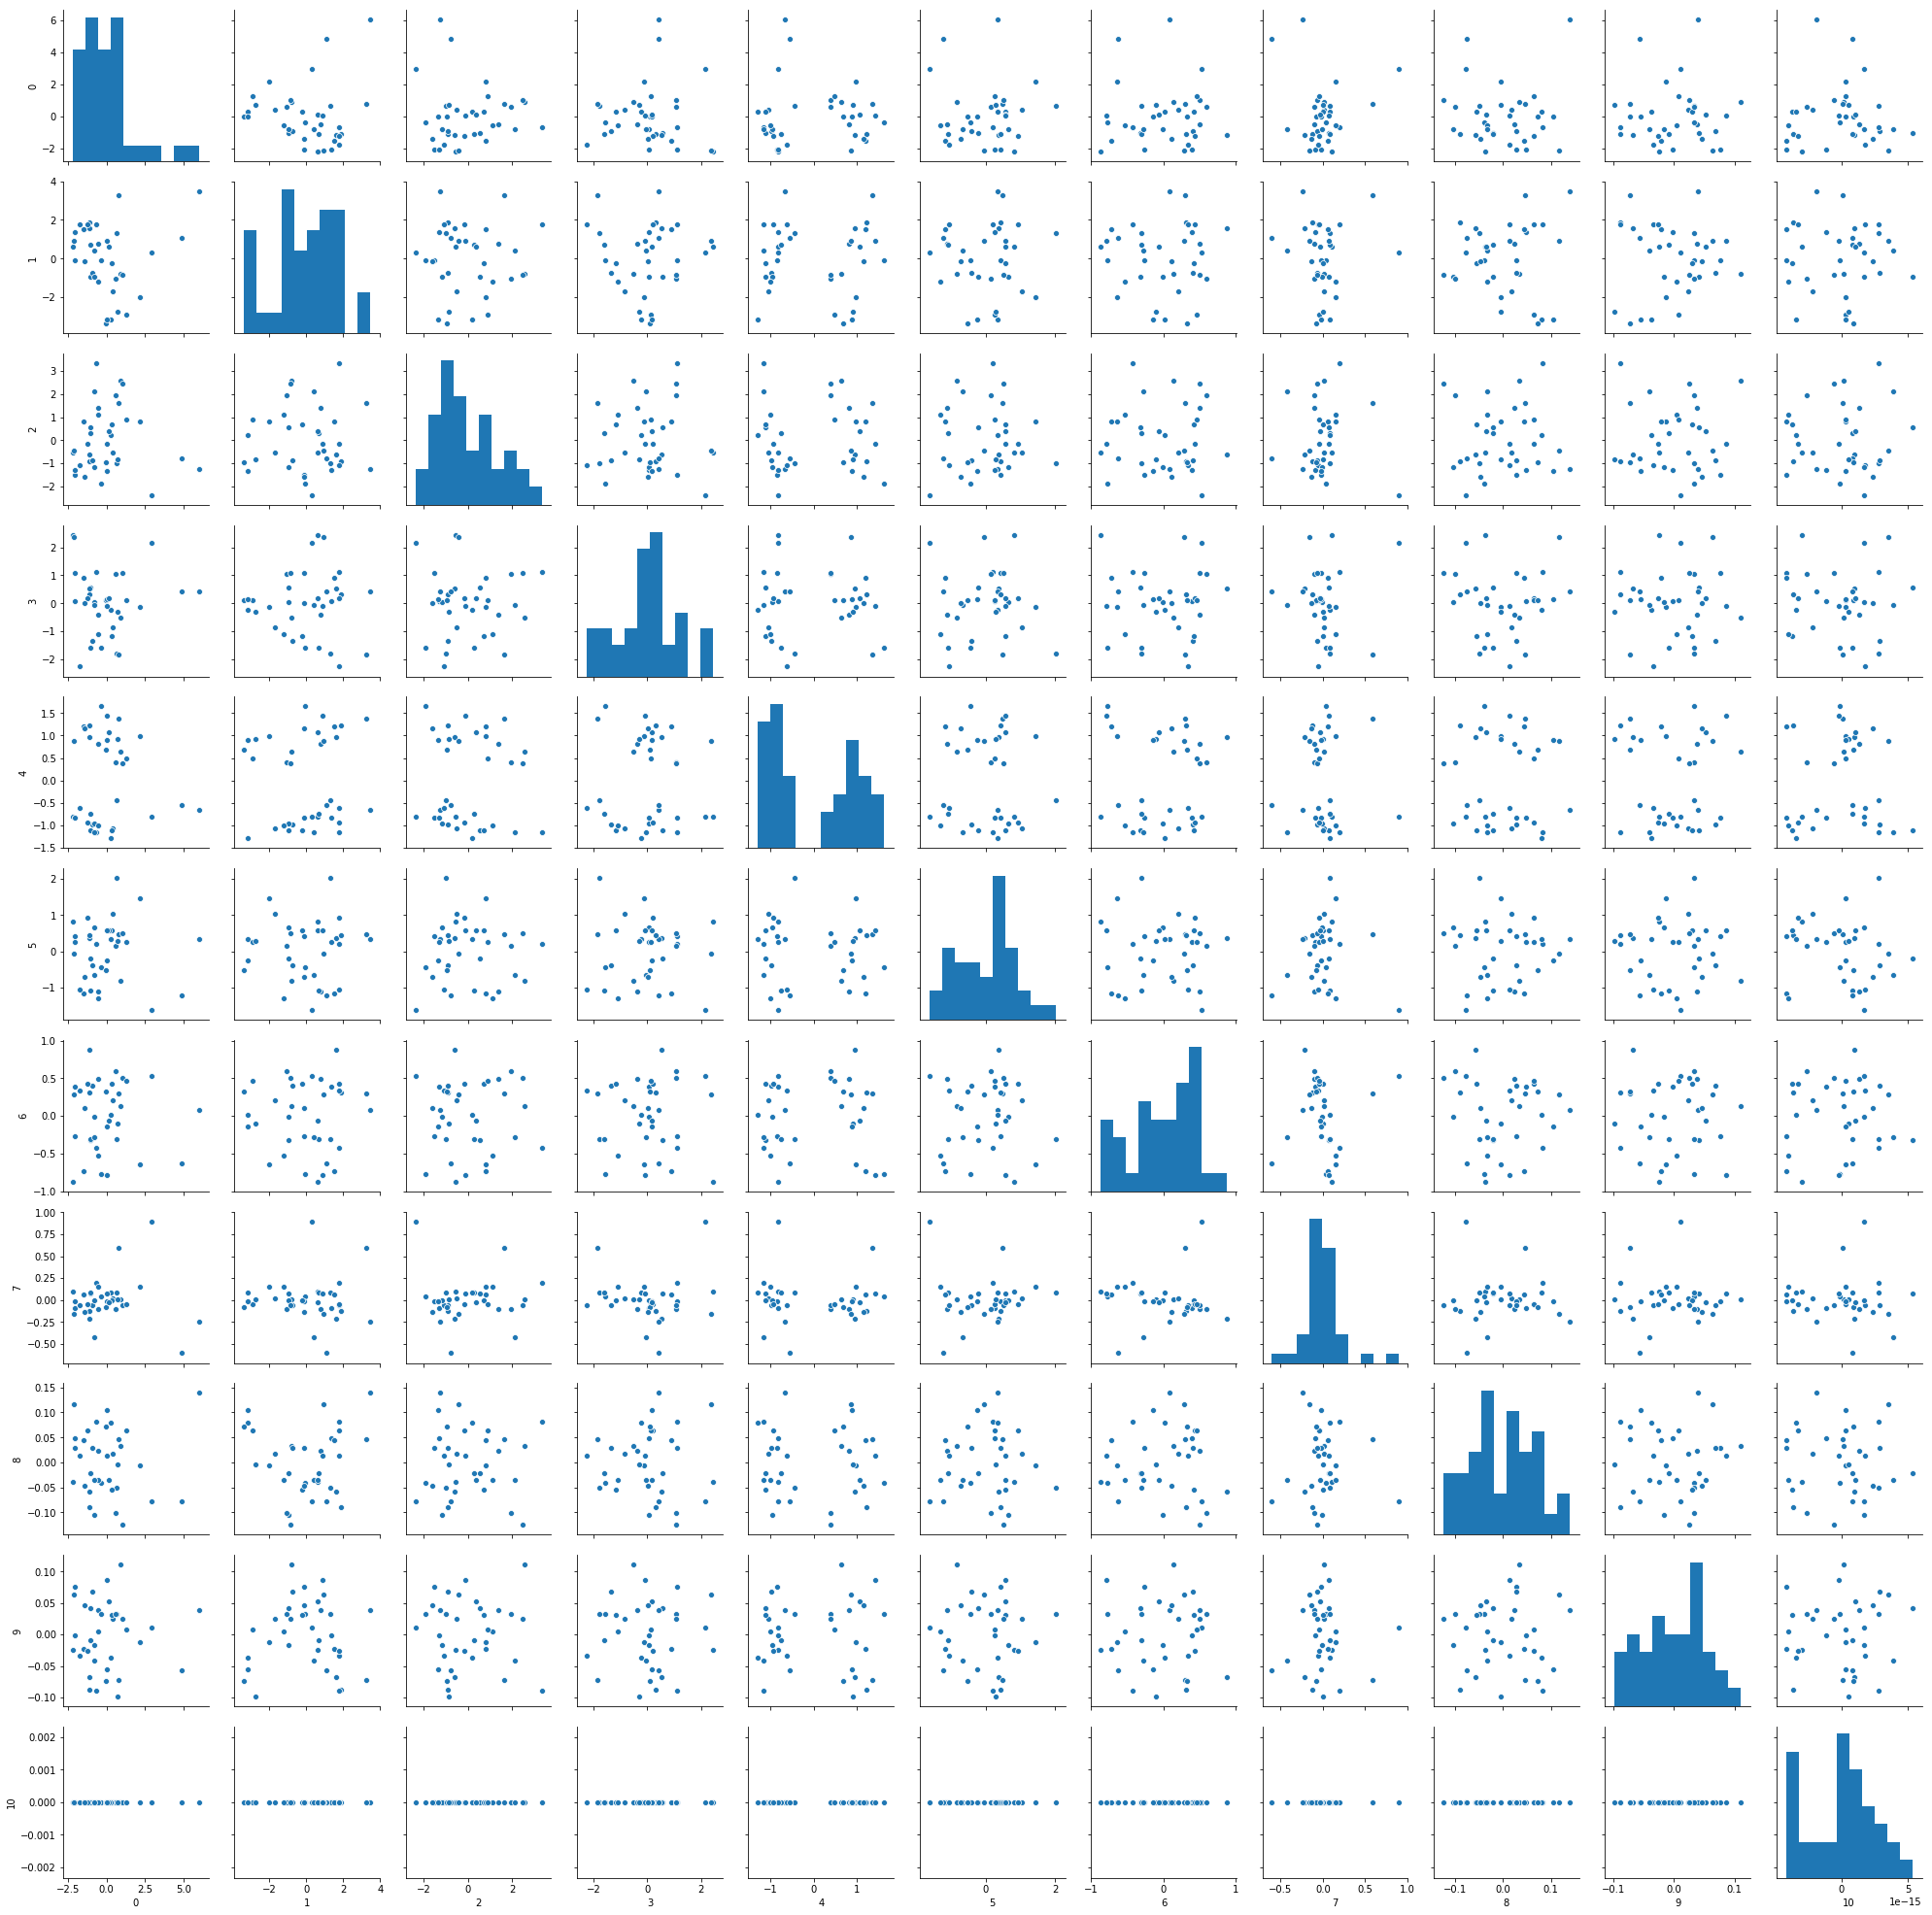

In [9]:
sns.pairplot(data_pca)

In [13]:
pca.explained_variance_ratio_

array([2.79489358e-01, 2.67365492e-01, 1.69270326e-01, 1.12053638e-01,
       8.63578334e-02, 6.10900466e-02, 1.86940096e-02, 5.04272850e-03,
       3.83949846e-04, 2.52618597e-04, 5.02769663e-31])

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27948936, 0.54685485, 0.71612518, 0.82817881, 0.91453665,
       0.97562669, 0.9943207 , 0.99936343, 0.99974738, 1.        ,
       1.        ])

In [19]:
comps = pd.DataFrame(pca.components_)

In [21]:
comps

,0,1,2,3,4,5,6,7,8,9,10
0,0.210040,-0.290346,-0.119899,0.125441,2.380823e-01,-5.688890e-02,-4.677872e-01,4.073004e-01,3.702607e-01,4.491838e-01,-2.407779e-01
1,-0.533591,0.199682,0.181959,0.395727,-1.229058e-02,5.422993e-01,-4.292633e-03,1.159154e-02,-7.086592e-03,1.657646e-01,-4.046951e-01
2,-0.026060,-0.005725,0.476840,-0.321845,-4.836331e-03,2.120526e-01,2.865297e-01,4.653781e-01,5.097648e-01,-2.209810e-01,1.263692e-01
3,-0.106115,0.699922,-0.312407,-0.415194,2.175554e-01,1.462486e-01,-1.895663e-01,9.256780e-02,4.421680e-02,2.444753e-01,2.322017e-01
4,0.042329,-0.009675,0.002791,-0.051720,8.708544e-01,-5.484380e-02,2.399892e-01,-7.508864e-02,-9.838544e-02,-2.490248e-01,-3.148181e-01
5,0.091567,0.139572,-0.679626,0.229087,-2.043211e-01,1.816213e-02,3.291003e-01,2.454420e-01,2.843821e-01,-3.300085e-01,-2.394967e-01
6,-0.116401,-0.172540,-0.144145,0.476570,2.957623e-01,2.080669e-01,5.839045e-02,1.850610e-01,-5.237954e-02,-3.019532e-02,7.326016e-01
7,0.135770,-0.047311,-0.005743,-0.135839,-8.961824e-02,1.523446e-01,-6.403074e-03,6.375927e-01,-7.104577e-01,-5.602639e-02,-1.230783e-01
8,0.320553,-0.189513,-0.117314,-0.151384,-1.256386e-02,3.698461e-01,5.678445e-01,-1.821317e-01,-2.999049e-02,5.754750e-01,4.049787e-03
9,-0.317307,0.176688,0.113151,0.164710,3.583631e-03,-6.555117e-01,4.139111e-01,2.626831e-01,-4.577656e-02,3.949862e-01,4.700883e-03


In [56]:
from matplotlib import cm

(-7, 7)

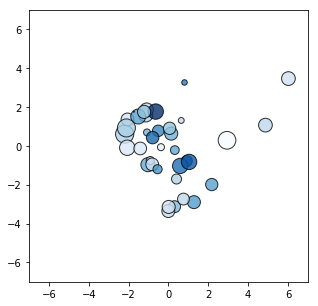

In [61]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(data_pca[0], data_pca[1], c=data_pca[2], s=size_v, cmap=cm.Blues, alpha=0.8, edgecolor='k')
ax.set_xlim([-7,7])
ax.set_ylim([-7,7])

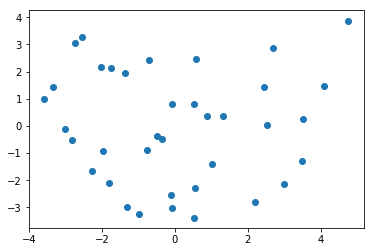

In [52]:
plt.scatter(data_pca[0]+data_pca[2], data_pca[1] + data_pca[3])

In [49]:
size_v.min()

-158.82642616112304